# Week10 - Lab

* Use PCA to reduce dimentionality and use a linear regression to predict
* Use t-SNE to visualize

In [16]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']
print(cancer.target_names)

['malignant' 'benign']


In [17]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 455
Test examples: 114


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

p = Pipeline([('scaling', StandardScaler()), 
              ('pca', PCA()),
              ('model', LogisticRegression())
             ])

params = {'model__C': [0.01, 0.1, 1, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
grid = grid.fit(X_train, y_train)

grid.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=10)),
                ('model', LogisticRegression(C=1))])

In [20]:
print(f'Validation score: {grid.best_score_:.2%}')
print(f'Test score: {grid.score(X_test, y_test):.2%}')

Validation score: 98.03%
Test score: 98.25%


In [38]:
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=10)
train_X = pca.fit_transform(X_train)
test_X = pca.transform(X_test)
linear = LinearRegression()
linear.fit(train_X, y_train)
y_pred = linear.predict(test_X)
accuracy = linear.score(test_X, y_test)

print(f"Accuracy of Breast Cancer: {accuracy:.2f}")


Accuracy of Breast Cancer: 0.66


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


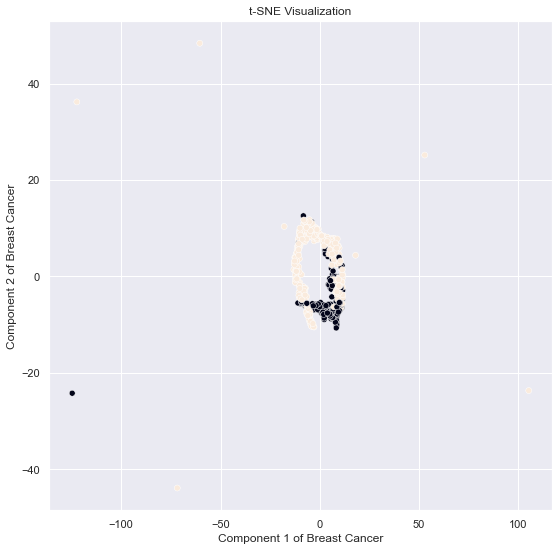

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=3, perplexity=20, random_state=40)
tsne_X = tsne.fit_transform(X)

import seaborn as sns

sns.set(rc={'figure.figsize':(9,9)})
sns.scatterplot(tsne_X[:, 0], tsne_X[:, 1],c=y)
plt.title('t-SNE Visualization')
plt.xlabel('Component 1 of Breast Cancer')
plt.ylabel('Component 2 of Breast Cancer')
plt.show()